In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
model = TFAutoModel.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
inputs = tokenizer(['SALLAM word', 'Hi how are you'], padding=True, truncation=True,
                  return_tensors='tf')
inputs

{'input_ids': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[  101, 16183, 10278,  2773,   102,     0],
       [  101,  7632,  2129,  2024,  2017,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [ ]:
output = model(inputs)
output

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(2, 6, 768), dtype=float32, numpy=
array([[[-0.31782103,  0.05398595, -0.3047992 , ..., -0.04831833,
          0.28220552,  0.46024305],
        [ 0.07825143, -0.10144268, -0.02263005, ..., -0.39489198,
         -0.33297503, -0.08365902],
        [-0.1472801 , -0.17388955, -0.25061423, ...,  0.28246427,
         -0.09037779, -0.11079074],
        [-0.31376308, -0.36569855, -0.7933052 , ...,  0.62151325,
          0.3982251 ,  0.16621356],
        [ 0.80596334,  0.09509642, -0.41920137, ...,  0.14669767,
         -0.70107245, -0.22720687],
        [-0.09610924, -0.08302575, -0.11025403, ..., -0.05290158,
          0.26456746,  0.5096383 ]],

       [[ 0.09286523, -0.02636338, -0.12239328, ..., -0.2106356 ,
          0.17386404,  0.17250954],
        [ 0.4074202 , -0.05930961,  0.5523475 , ..., -0.67905706,
          0.6555752 , -0.29456577],
        [-0.21155253, -0.6858638 , -0.46280712, ...,  0.15278488

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

# Load the CSV file
df = pd.read_csv('/content/tweets.csv')

# Map labels to label_text for better clarity
label_mapping = {0: 'neutral', 2: 'positive', 3: 'negative'}

# Add a new column 'label_text' based on the 'label'
df['label_text'] = df['label'].map(label_mapping)

# Split the dataframe into train, validation, and test sets (using 80/10/10 split)
train_df = df.sample(frac=0.8, random_state=42)
remaining_df = df.drop(train_df.index)
val_df = remaining_df.sample(frac=0.5, random_state=42)
test_df = remaining_df.drop(val_df.index)

# Convert pandas dataframes to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Create a DatasetDict
emotions = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

# Display the dataset structure
print(emotions)



DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 1440
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 180
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 180
    })
})


In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 1440
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 180
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 180
    })
})

In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)


emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded

Map:   0%|          | 0/1440 [00:00<?, ? examples/s]

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1440
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 180
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 180
    })
})

In [ ]:
# setting 'input_ids', 'attention_mask', 'token_type_ids', and 'label'
# to the tensorflow format. Now if you access this dataset you will get these
# columns in `tf.Tensor` format

emotions_encoded.set_format('tf',
                            columns=['input_ids', 'attention_mask', 'token_type_ids', 'label'])

# setting BATCH_SIZE to 64.
BATCH_SIZE = 64

def order(inp):
    '''
    This function will group all the inputs of BERT
    into a single dictionary and then output it with
    labels.
    '''
    data = list(inp.values())
    return {
        'input_ids': data[1],
        'attention_mask': data[2],
        'token_type_ids': data[3]
    }, data[0]

# converting train split of `emotions_encoded` to tensorflow format
train_dataset = tf.data.Dataset.from_tensor_slices(emotions_encoded['train'][:])
# set batch_size and shuffle
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
# map the `order` function
train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# ... doing the same for test set ...
test_dataset = tf.data.Dataset.from_tensor_slices(emotions_encoded['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
inp, out = next(iter(train_dataset)) # a batch from train_dataset
print(inp, '\n\n', out)

{'input_ids': <tf.Tensor: shape=(32, 68), dtype=int64, numpy=
array([[  101,  4921,  2063, ...,     0,     0,     0],
       [  101,  1045,  3427, ...,     0,     0,     0],
       [  101,  1045,  2572, ...,     0,     0,     0],
       ...,
       [  101,  1045,  2001, ...,     0,     0,     0],
       [  101,  1045, 10468, ...,     0,     0,     0],
       [  101,  1045,  2729, ...,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(32, 68), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'token_type_ids': <tf.Tensor: shape=(32, 68), dtype=int64, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>} 

 tf.Tensor([5 3 3 5 0 3 3 5 5 2 0 1 1 5

In [ ]:

# Display model summary in a clean, readable format
def display_model_summary(model):
    print("\n" + "="*50)
    print("Model Architecture Overview".center(50))
    print("="*50)
    model.build(input_shape=(None, 64, 768))  # Adjust input shape if needed
    model.summary()
    print("="*50 + "\n")

# Show some sample data from the dataset
def display_sample_data(dataset, num_samples=5):
    print("\n" + "="*50)
    print("Dataset Samples".center(50))
    print("="*50)
    for i in range(num_samples):
        print(f"Sample {i+1}")
        print(f"Text: {dataset['train'][i]['text']}")
        print(f"Label: {dataset['train'][i]['label']}")
        print("-" * 50)
    print("="*50 + "\n")

# Plot the accuracy and loss during training
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
    plt.title('Model Accuracy', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True)
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss', color='red')
    plt.title('Model Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluate model on test set and display results
def evaluate_model(model, test_data):
    print("\n" + "="*50)
    print("Model Evaluation on Test Data".center(50))
    print("="*50)
    results = model.evaluate(test_data)
    print(f"Test Loss: {results[0]:.4f}")
    print(f"Test Accuracy: {results[1]:.4f}")
    print("="*50 + "\n")

# Now let's call these functions after your training
# Display a few samples from the dataset
display_sample_data(emotions)






                 Dataset Samples                  
Sample 1
Text: i feel surprised by my reaction because as a younger woman i always thought i would be a darling older woman
Label: 5
--------------------------------------------------
Sample 2
Text: i feel utterly disgusted that they would look at me in such a way but the thing continues
Label: 3
--------------------------------------------------
Sample 3
Text: i get the feeling he has naughty intentions
Label: 2
--------------------------------------------------
Sample 4
Text: i do find new friends i m going to try extra hard to make them stay and if i decide that i don t want to feel hurt again and just ride out the last year of school on my own i m going to have to try extra hard not to care what people think of me being a loner
Label: 0
--------------------------------------------------
Sample 5
Text: i feel shy when people reading these but i am writing it here so brothers and sisters would see how real life works
Label: 4
------

In [ ]:
class BERTForClassification(tf.keras.Model):

    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

In [ ]:
classifier = BERTForClassification(model, num_classes=6)

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


history = classifier.fit(
    train_dataset,
    epochs=16
)


Epoch 1/16
23/23 [==============================] - 1049s 44s/step - loss: 1.8655 - accuracy: 0.1514
Epoch 2/16
23/23 [==============================] - 1006s 44s/step - loss: 1.7970 - accuracy: 0.1729
Epoch 3/16
23/23 [==============================] - 1002s 44s/step - loss: 1.7896 - accuracy: 0.1799
Epoch 4/16
23/23 [==============================] - 1017s 44s/step - loss: 1.7905 - accuracy: 0.1896
Epoch 5/16
23/23 [==============================] - 1008s 44s/step - loss: 1.7673 - accuracy: 0.2125
Epoch 6/16
23/23 [==============================] - 1005s 44s/step - loss: 1.7056 - accuracy: 0.2708
Epoch 7/16
23/23 [==============================] - 994s 43s/step - loss: 1.6159 - accuracy: 0.3042
Epoch 8/16
23/23 [==============================] - 993s 43s/step - loss: 1.4758 - accuracy: 0.3812
Epoch 9/16
23/23 [==============================] - 1000s 43s/step - loss: 1.2010 - accuracy: 0.5840
Epoch 10/16
23/23 [==============================] - 993s 44s/step - loss: 0.8844 - accuracy:

In [ ]:
classifier.evaluate(test_dataset)

3/3 [==============================] - 37s 11s/step - loss: 0.6497 - accuracy: 0.8056


[0.649695098400116, 0.8055555820465088]

In [ ]:
history

In [ ]:




# Plot training accuracy and loss
# plot_training_history(history)

# Evaluate the model on the test set and display results
evaluate_model(classifier, test_dataset)




          Model Evaluation on Test Data           
3/3 [==============================] - 31s 10s/step - loss: 0.6497 - accuracy: 0.8056
Test Loss: 0.6497
Test Accuracy: 0.8056



2/2 [==============================] - 15s 4s/step


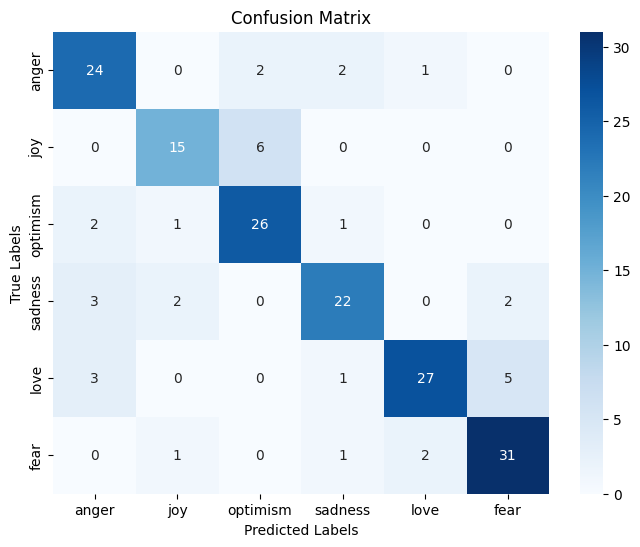

In [ ]:
!pip install seaborn
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(true_labels, predictions, class_names):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Getting predictions and true labels from the test set
def get_predictions_and_labels(model, dataset):
    true_labels = []
    predictions = []

    for batch in dataset:
        inputs, labels = batch
        preds = model.predict(inputs)
        predicted_labels = np.argmax(preds, axis=1)

        true_labels.extend(labels.numpy())
        predictions.extend(predicted_labels)

    return np.array(true_labels), np.array(predictions)

# Call the function to get predictions and labels
true_labels, predicted_labels = get_predictions_and_labels(classifier, test_dataset)

# Define class names (based on the emotion dataset used)
class_names = ['anger', 'joy', 'optimism', 'sadness', 'love', 'fear']

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predicted_labels, class_names)
